# Week # 6


In [53]:
import pandas as pd
import random as rd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans

In [35]:
iris_df = pd.read_csv("iris_csv.csv")


In [36]:
iris_df.sample(10)

,sepallength,sepalwidth,petallength,petalwidth,class
114,5.8,2.8,5.1,2.4,Iris-virginica
48,5.3,3.7,1.5,0.2,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
105,7.6,3.0,6.6,2.1,Iris-virginica


In [37]:
cols = iris_df.columns[:-1]

array([[<AxesSubplot:xlabel='sepallength', ylabel='sepallength'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='sepallength'>,
        <AxesSubplot:xlabel='petallength', ylabel='sepallength'>,
        <AxesSubplot:xlabel='petalwidth', ylabel='sepallength'>],
       [<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='sepalwidth'>,
        <AxesSubplot:xlabel='petallength', ylabel='sepalwidth'>,
        <AxesSubplot:xlabel='petalwidth', ylabel='sepalwidth'>],
       [<AxesSubplot:xlabel='sepallength', ylabel='petallength'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='petallength'>,
        <AxesSubplot:xlabel='petallength', ylabel='petallength'>,
        <AxesSubplot:xlabel='petalwidth', ylabel='petallength'>],
       [<AxesSubplot:xlabel='sepallength', ylabel='petalwidth'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='petalwidth'>,
        <AxesSubplot:xlabel='petallength', ylabel='petalwidth'>,
        <AxesSubplot:

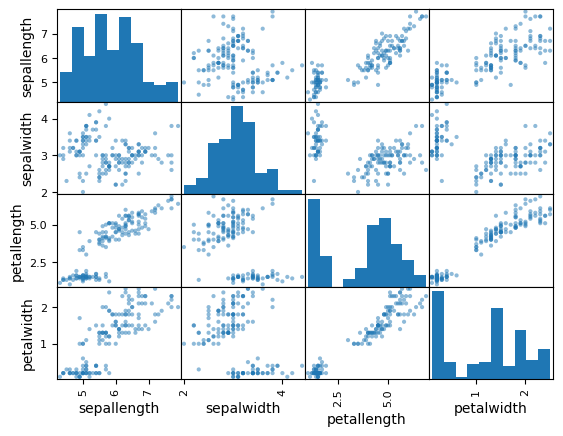

In [38]:
pd.plotting.scatter_matrix(iris_df[cols])


In [39]:
# pca = PCA(n_components=2) # 4?
pca = PCA() # 4?
pca.fit(iris_df[cols])
transformed_irirs = pca.transform(iris_df[cols])

In [40]:
transformed_irirs.shape

(150, 4)

In [41]:

color = dict(zip(iris_df["class"].unique(),["red","green","blue"]))

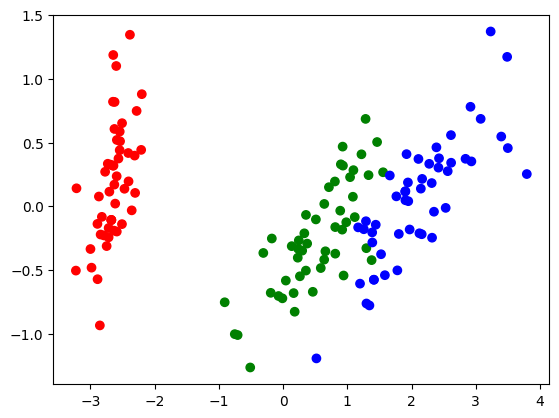

In [42]:
plt.scatter(transformed_irirs[:,0],transformed_irirs[:,1], c=iris_df["class"].apply(lambda x: color.get(x)))

In [43]:
# loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=cols)
loadings = pd.DataFrame(pca.components_.T)
loadings

,0,1,2,3
0,0.361590,0.656540,-0.580997,0.317255
1,-0.082269,0.729712,0.596418,-0.324094
2,0.856572,-0.175767,0.072524,-0.479719
3,0.358844,-0.074706,0.549061,0.751121


In [44]:
iris_df.corr(method="pearson")


,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [49]:
tdf = pd.DataFrame(transformed_irirs)
tdf.corr(method="pearson")

,0,1,2,3
0,1.000000e+00,-2.504215e-17,6.416519e-16,-4.793631e-16
1,-2.504215e-17,1.000000e+00,-8.103789e-18,-4.955578e-16
2,6.416519e-16,-8.103789e-18,1.000000e+00,4.751570e-16
3,-4.793631e-16,-4.955578e-16,4.751570e-16,1.000000e+00


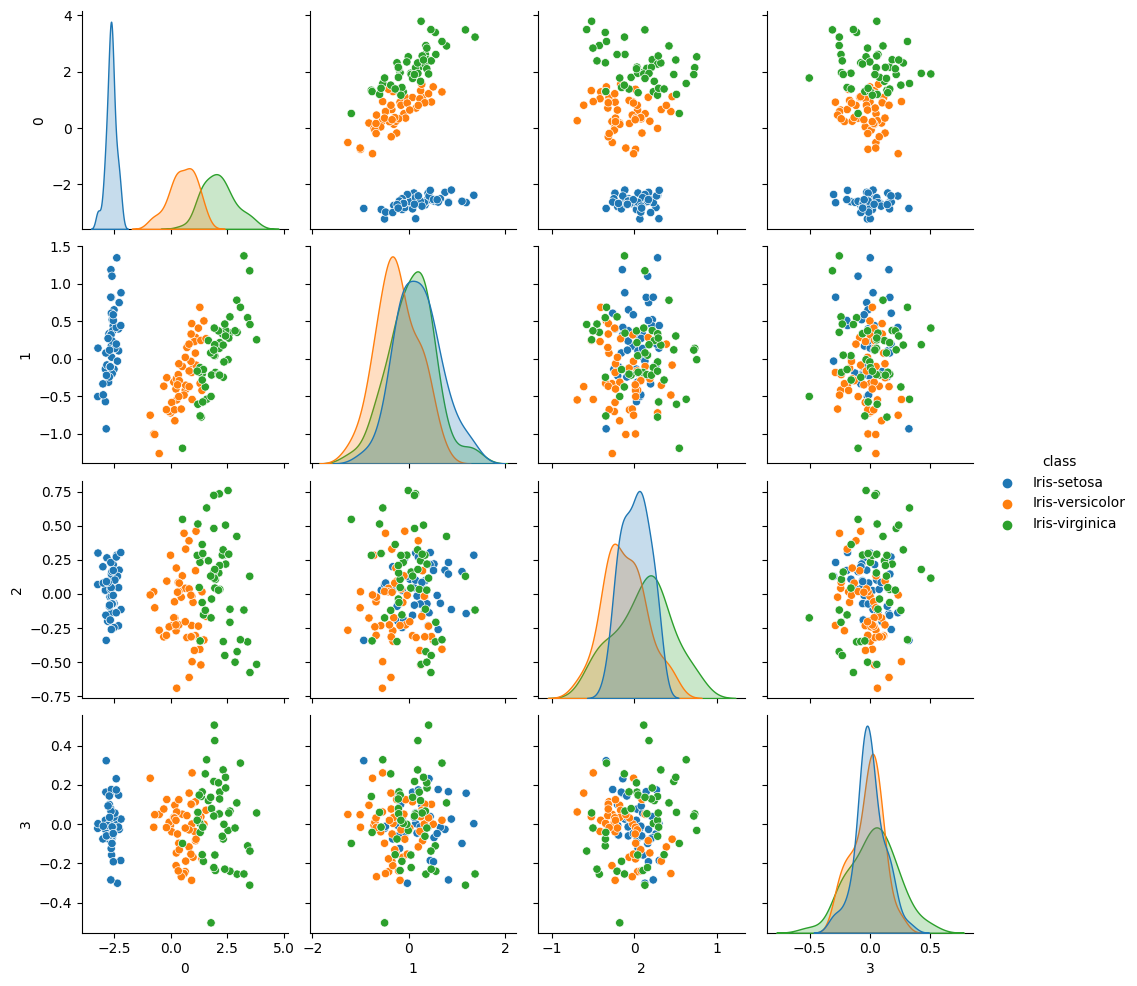

In [60]:
tdf["class"] = iris_df["class"]
sns.pairplot(tdf,hue="class")


In [46]:


kmeans = KMeans(n_clusters=3).fit(iris_df[cols])
predictions = kmeans.predict(iris_df[cols])

iris_df["cluster"] = pd.Categorical(predictions)

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

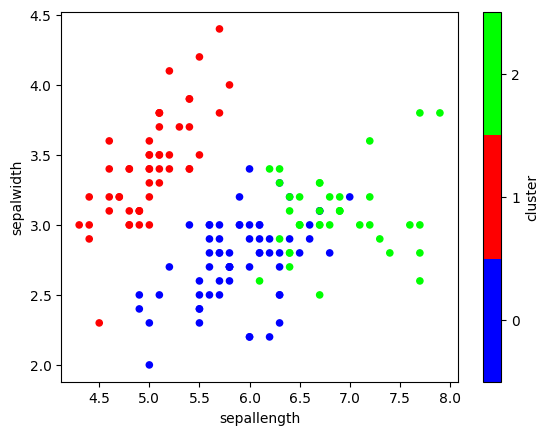

In [47]:
iris_df.plot.scatter(0, 1, c='cluster', colormap='brg',)

In [51]:
pd.crosstab(iris_df["class"],iris_df["cluster"])

cluster,0,1,2
class,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36
